# Exploratory Data Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import project_functions as pf
import re
from wordcloud import WordCloud, STOPWORDS

In [2]:
# Set plotting config
pf.set_plot_config()

In [3]:
df = pf.imdb_train_test_dfs()
# Get counts of words
df["n_tokens"] = df.review.str.split().map(len)

In [4]:
# Check for nas
df.isnull().sum()

review       0
sentiment    0
n_tokens     0
dtype: int64

Text(0.5, 1.0, 'Histogram of Number of Words in Reviews')

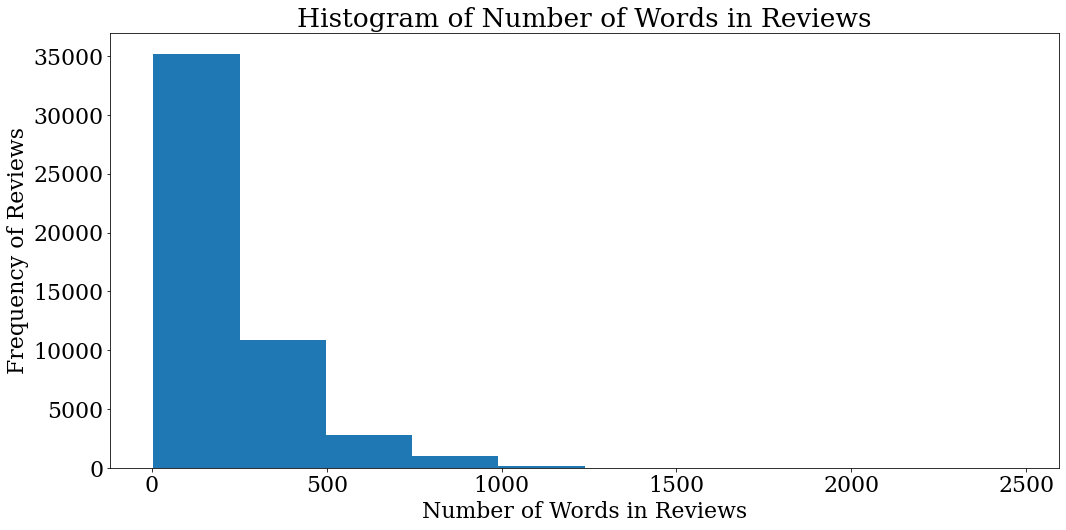

In [5]:
# Histogram of number of words
fig, ax = plt.subplots()
ax.hist(df.n_tokens)
ax.set_ylabel("Frequency of Reviews")
ax.set_xlabel("Number of Words in Reviews")
ax.set_title("Histogram of Number of Words in Reviews")

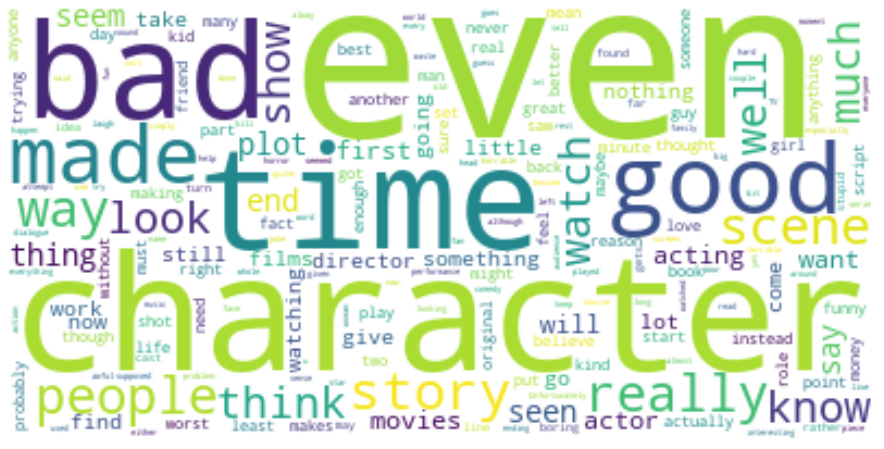

In [6]:
# Get wordclouds for negative reviews
all_reviews = " ".join(df[df.sentiment == 0].review)
stopwords = set(STOPWORDS)
# remove certain uninformative words
stopwords.update(["br", "movie", "film", "one", "make", "see"])
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(all_reviews)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig("neg_wordcloud.png")
plt.show()

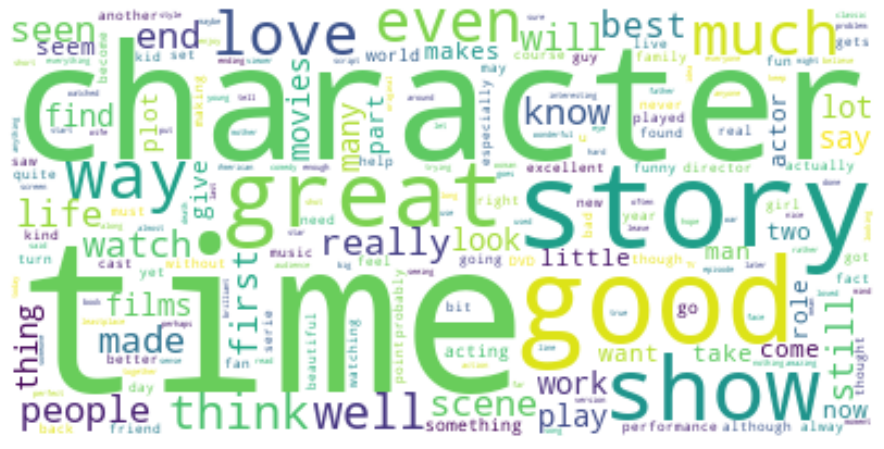

In [7]:
# Get wordclouds for positive and negative reviews
all_reviews = " ".join(df[df.sentiment == 1].review)
stopwords = set(STOPWORDS)
# remove certain uninformative words
stopwords.update(["br", "movie", "film", "one", "make", "see"])
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(all_reviews)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig("pos_wordcloud.png")
plt.show()

In [8]:
# Verify classes are balanced
df.groupby("sentiment").count()

,review,n_tokens
sentiment,,
0,25000,25000
1,25000,25000
